In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
nodes=pd.read_csv("data/hetionet-v1.0-nodes.tsv",sep="\t")

In [4]:
nodes.head(10)

,id,name,kind
0,Anatomy::UBERON:0000002,uterine cervix,Anatomy
1,Anatomy::UBERON:0000004,nose,Anatomy
2,Anatomy::UBERON:0000006,islet of Langerhans,Anatomy
3,Anatomy::UBERON:0000007,pituitary gland,Anatomy
4,Anatomy::UBERON:0000010,peripheral nervous system,Anatomy
5,Anatomy::UBERON:0000011,parasympathetic nervous system,Anatomy
6,Anatomy::UBERON:0000013,sympathetic nervous system,Anatomy
7,Anatomy::UBERON:0000020,sense organ,Anatomy
8,Anatomy::UBERON:0000026,appendage,Anatomy
9,Anatomy::UBERON:0000029,lymph node,Anatomy


In [5]:
edges=pd.read_csv("data/hetionet-v1.0-edges.sif/edges.sif",sep="\t",names=["source","relation","target"])

In [6]:
edges.head(10)

,source,relation,target
0,source,metaedge,target
1,Gene::9021,GpBP,Biological Process::GO:0071357
2,Gene::51676,GpBP,Biological Process::GO:0098780
3,Gene::19,GpBP,Biological Process::GO:0055088
4,Gene::3176,GpBP,Biological Process::GO:0010243
5,Gene::3039,GpBP,Biological Process::GO:0006898
6,Gene::5962,GpBP,Biological Process::GO:0051346
7,Gene::841,GpBP,Biological Process::GO:0043207
8,Gene::6924,GpBP,Biological Process::GO:0006354
9,Gene::7407,GpBP,Biological Process::GO:0006417


In [7]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47031 entries, 0 to 47030
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      47031 non-null  object
 1   name    47031 non-null  object
 2   kind    47031 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [8]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250198 entries, 0 to 2250197
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   source    object
 1   relation  object
 2   target    object
dtypes: object(3)
memory usage: 51.5+ MB


In [9]:
edges=edges[edges["source"]!="source"]
edges.reset_index(drop=True,inplace=True)

In [10]:
edges.head()

,source,relation,target
0,Gene::9021,GpBP,Biological Process::GO:0071357
1,Gene::51676,GpBP,Biological Process::GO:0098780
2,Gene::19,GpBP,Biological Process::GO:0055088
3,Gene::3176,GpBP,Biological Process::GO:0010243
4,Gene::3039,GpBP,Biological Process::GO:0006898


In [12]:
nodes["kind"].unique()

array(['Anatomy', 'Biological Process', 'Cellular Component', 'Compound',
       'Disease', 'Gene', 'Molecular Function', 'Pathway',
       'Pharmacologic Class', 'Side Effect', 'Symptom'], dtype=object)

In [13]:
edges["relation"].unique()

array(['GpBP', 'GiG', 'CrC', 'DdG', 'DpS', 'DlA', 'CtD', 'CbG', 'CuG',
       'DrD', 'DaG', 'CpD', 'AdG', 'AuG', 'GcG', 'GpMF', 'PCiC', 'GpCC',
       'Gr>G', 'CdG', 'DuG', 'GpPW', 'CcSE', 'AeG'], dtype=object)

- **GpBP**: G-protein Binding Protein — involved in signal transduction.
- **GiG**: Gi G-protein — inhibitory G-protein subtype.
- **CrC**: Cortical Cell — neuron or glial cell from the brain cortex.
- **DdG**: Dorsal Dendrite Group — neural dendrite structure.
- **DpS**: Dopaminergic Synapse — synapse that releases dopamine.
- **DlA**: Dorsolateral Amygdala — brain region tied to emotion and drug response.
- **CtD**: Cortical Dendrite — dendritic part of cortical neurons.
- **CbG**: Cerebellar Granule Cell — key cell type in motor control.
- **CuG**: Cuneate Gyrus — region in the somatosensory system.
- **DrD**: Dopamine Receptor D — common drug target in psychiatry.
- **DaG**: Dorsal Anterior Gyrus — frontal lobe area involved in cognition.
- **CpD**: Caudate-Putamen Dopamine — part of basal ganglia, motor/reward.
- **AdG**: Adrenal Gland — produces hormones like cortisol, epinephrine.
- **AuG**: Auditory Gyrus — processes auditory information.
- **GcG**: Glial Cell Group — support cells for neurons; important in drug metabolism.
- **GpMF**: G-protein Motor Function — signaling unit affecting movement.
- **PCiC**: Precentral Cortex — involved in motor control (primary motor cortex).
- **GpCC**: G-protein Coupled Complex — possible reference to GPCR family.
- **Gr>G**: Granule → Golgi — directional connection, e.g., in cerebellar microcircuit.
- **CdG**: Caudate Ganglion — part of the striatum, regulates movement and reward.
- **DuG**: Dural Ganglion — possible sensory ganglion near dura mater.
- **GpPW**: G-protein Pathway — signaling route via G-proteins.
- **CcSE**: Corpus Callosum Somatosensory Exchange — interhemispheric signal transfer.
- **AeG**: Amygdala Emotional Ganglia — emotional processing center.

In [14]:
nodes["kind"].value_counts()

kind
Gene                   20945
Biological Process     11381
Side Effect             5734
Molecular Function      2884
Pathway                 1822
Compound                1552
Cellular Component      1391
Symptom                  438
Anatomy                  402
Pharmacologic Class      345
Disease                  137
Name: count, dtype: int64

In [15]:
edges["relation"].value_counts()

relation
GpBP    559504
AeG     526407
Gr>G    265672
GiG     147164
CcSE    138944
AdG     102240
AuG      97848
GpMF     97222
GpPW     84372
GpCC     73566
GcG      61690
CdG      21102
CuG      18756
DaG      12623
CbG      11571
DuG       7731
DdG       7623
CrC       6486
DlA       3602
DpS       3357
PCiC      1029
CtD        755
DrD        543
CpD        390
Name: count, dtype: int64

In [16]:
nodes.isnull().sum()

id      0
name    0
kind    0
dtype: int64

In [17]:
edges.isnull().sum()

source      0
relation    0
target      0
dtype: int64

In [18]:
edges.drop_duplicates(inplace=True)
edges=edges[edges["source"]!=edges["target"]]

In [19]:
print("Nodes:",len(nodes))
print("Edges:",len(edges))
print("Node types:",nodes["kind"].nunique())
print("Relation types:",edges["relation"].nunique())

Nodes: 47031
Edges: 2250197
Node types: 11
Relation types: 24


In [20]:
sample_edges=edges.sample(1000,random_state=42)
G=nx.from_pandas_edgelist(sample_edges,"source","target")

In [26]:
print("nodes:",G.number_of_nodes(),"\nedges:",G.number_of_edges(),"\ndirected:",G.is_directed())
if G.is_directed():
    comps=nx.number_weakly_connected_components(G)
else:
    comps=nx.number_connected_components(G)
print("connected components:",comps)

nodes: 1643 
edges: 1000 
directed: False
connected components: 643


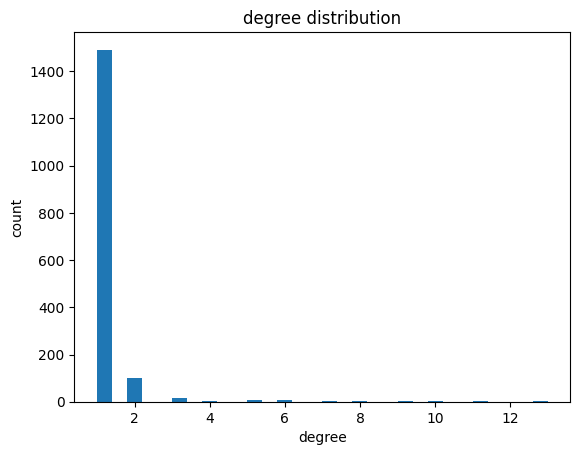

In [31]:
deg=[d for n,d in G.degree()]
plt.hist(deg,bins=30)
plt.xlabel("degree")
plt.ylabel("count")
plt.title("degree distribution")
plt.show()

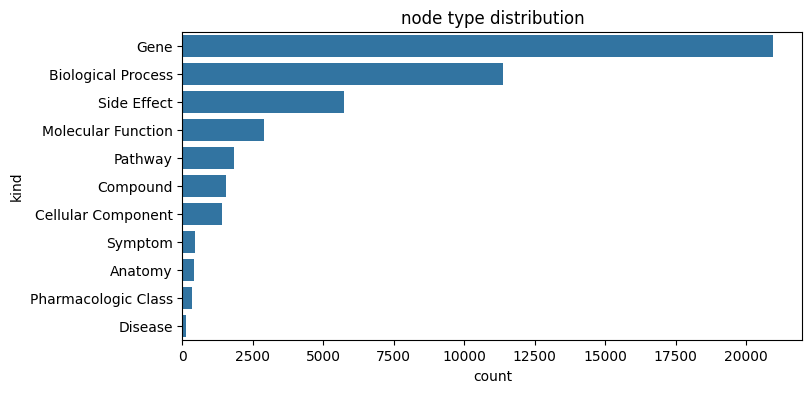

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(y="kind",data=nodes,order=nodes["kind"].value_counts().index)
plt.title("node type distribution")
plt.show()

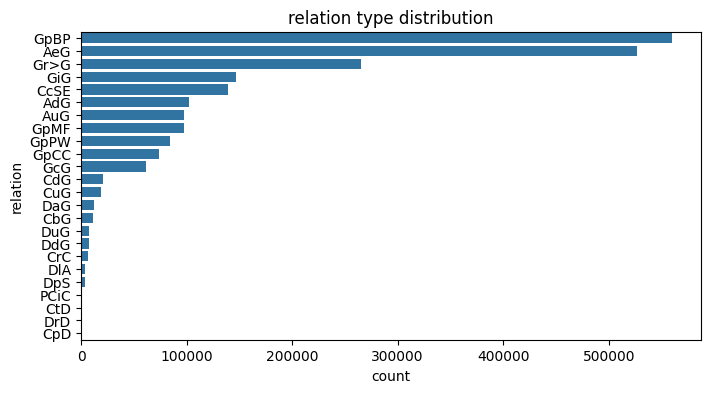

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(y="relation",data=edges,order=edges["relation"].value_counts().index)
plt.title("relation type distribution")
plt.show()

In [35]:
nodes.to_csv("data/clean_nodes.csv",index=False)
edges.to_csv("data/clean_edges.csv",index=False)